In [0]:
!pip install kaggle


In [0]:
!mkdir .kaggle


mkdir: cannot create directory ‘.kaggle’: File exists


In [0]:
import json
token = {"username":"mssanjay","key":"63500b560696ce791d6ad3363a760246"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!chmod 600 /content/.kaggle/kaggle.json


In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json


In [0]:
!kaggle config set -n path -v{/content}


- path is now set to: {/content}


In [0]:
!kaggle datasets download -d tentotheminus9/seti-data -p/content


100% 5.23G/5.25G [00:47<00:00, 146MB/s]
100% 5.25G/5.25G [00:47<00:00, 118MB/s]


In [0]:
!unzip \*.zip

Archive:  seti-data.zip
  inflating: primary_small_v3.zip    
  inflating: primary_small.zip       


In [0]:
ls

primary_small_v3.zip  primary_small.zip  sample_data/  seti-data.zip


In [0]:
rm primary_small_v3.zip

In [0]:
ls

primary_small.zip  sample_data/  seti-data.zip


In [0]:
!unzip \*.zip

In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [0]:
def pp(img,gray=False):
    img = cv2.resize(img, (224, 224))
    if gray:
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    mean = np.mean(img)
    std = np.std(img)
    imag = np.clip(img, mean-3.5*std, mean+3.5*std)
  
    img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel=np.ones((3, 3), dtype=np.float32))
    x = cv2.Sobel(img, cv2.CV_64F, 1, 0, 2)
    y = cv2.Sobel(img, cv2.CV_64F, 0, 1, 2)
    img = cv2.addWeighted(src1=x, alpha=0.7, src2=y, beta=0.3, gamma=0)
    img = img.reshape(224, 224, 1)
    img = img/255
    return img
  
  



'\ndef preprocess_image(image, resize=False, grayscale=False):\n    # start by resizing the image\n    if resize:\n        image = cv2.resize(image, (image_width, image_hieght))\n    # if grayscale\n    if grayscale:\n        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)\n    #if clip_outliers:\n    mean = np.mean(image)\n    std = np.std(image)\n        # clip all the values which are 3.5 standard deviations away from mean\n    image = np.clip(image, mean-3.5*std, mean+3.5*std)\n    #if gaussian_blurr:\n        #image = cv2.GaussianBlur(image, (3, 3), 1)\n    # morph close \n    morphed = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel=np.ones((3, 3), dtype=np.float32))\n    # gradient in both directions\n    sobelx = cv2.Sobel(morphed, cv2.CV_64F, 1, 0, 2)\n    sobely = cv2.Sobel(morphed, cv2.CV_64F, 0, 1, 2)\n    # final weight with a concentration in horizontal gradient\n    blended = cv2.addWeighted(src1=sobelx, alpha=0.7, src2=sobely, beta=0.3, gamma=0)\n    blended = blended.r

In [0]:
img=plt.imread('valid/squigglesquarepulsednarrowband/939_squigglesquarepulsednarrowband.png')

In [0]:
(pp(img))

array([[[ 0.00000000e+00],
        [-9.11945923e-05],
        [ 0.00000000e+00],
        ...,
        [-3.58627544e-04],
        [-3.58627544e-04],
        [ 0.00000000e+00]],

       [[ 0.00000000e+00],
        [-9.11945923e-05],
        [ 0.00000000e+00],
        ...,
        [-3.97908010e-04],
        [-3.22683512e-04],
        [ 0.00000000e+00]],

       [[ 2.60702722e-04],
        [ 9.48134591e-05],
        [ 2.15885920e-04],
        ...,
        [-3.46683474e-04],
        [-1.96879401e-04],
        [ 0.00000000e+00]],

       ...,

       [[ 1.34874793e-05],
        [-5.83219832e-04],
        [-6.70310212e-04],
        ...,
        [ 2.46326456e-04],
        [ 2.02377777e-04],
        [-8.78973568e-05]],

       [[ 1.34874793e-05],
        [-9.88787202e-04],
        [-1.19729147e-03],
        ...,
        [ 1.29310921e-04],
        [ 8.28737371e-05],
        [-8.84140239e-05]],

       [[ 0.00000000e+00],
        [-1.14127753e-03],
        [-1.14127753e-03],
        ...,
        

In [0]:
img = cv2.resize(img,(224,224))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mean = np.mean(img)
std = np.std(img)
img = np.clip(img, mean-3.5*std, mean+3.5*std)
  #img = cv2.GaussianBlur(img, (3, 3), 1)#noise from data acquisition sensor
img1 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel=np.ones((3, 3), dtype=np.float32))#fill holes
sobelx = cv2.Sobel(img1, cv2.CV_64F, 1, 0, 2)
sobely = cv2.Sobel(img1, cv2.CV_64F, 0, 1, 2)
img2 = cv2.addWeighted(sobelx,0.7,sobely,0.3,0)
print(np.shape(img2))
img=img.reshape(224,224,1)
print(np.shape(img2))

img2=img2/255
print(np.shape(img2))


(224, 224)
(224, 224)
(224, 224)


In [0]:
lol=(img.reshape(224,224,1))

In [0]:
np.shape(lol/255)

(224, 224, 1)

TypeError: ignored

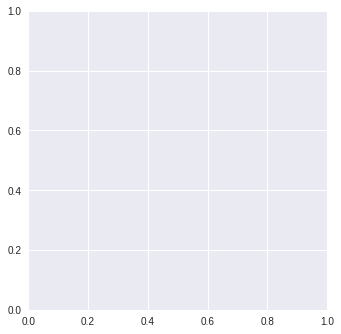

In [0]:
plt.imshow(img)

In [0]:
img = cv2.resize(img, (224,224))


In [0]:
img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)

error: ignored

In [0]:
mean = np.mean(img)
std = np.std(img)

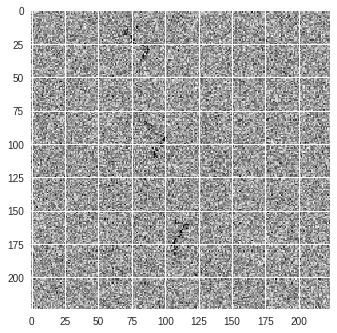

In [0]:
img = np.clip(img, mean-3.5*std, mean+3.5*std)
plt.imshow(img)

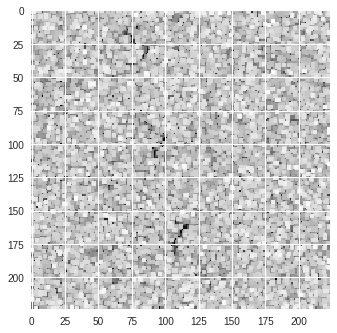

In [0]:
img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel=np.ones((3, 3), dtype=np.float32))
plt.imshow(img)

In [0]:
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, 2)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, 2)


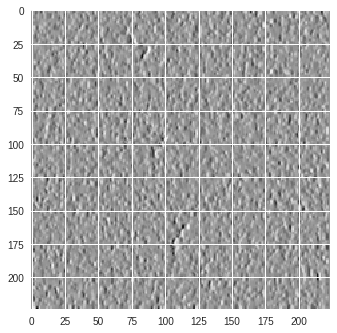

In [0]:
plt.imshow(sobelx)

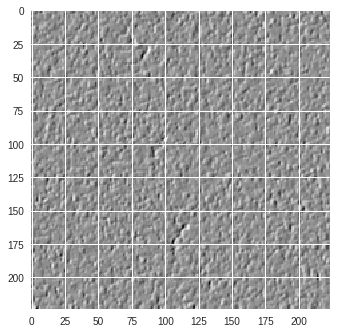

In [0]:
img = cv2.addWeighted(sobelx,0.7,sobely,0.3,0)
plt.imshow(img)

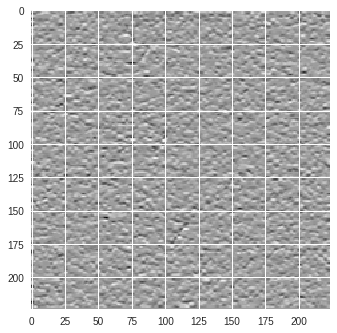

In [0]:
plt.imshow(sobely)

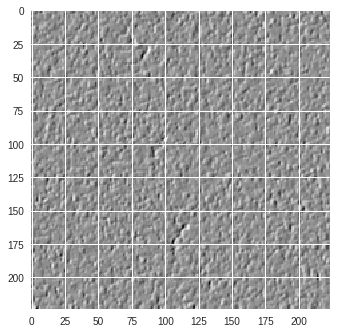

In [0]:
plt.imshow(img/255)

In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_gen=ImageDataGenerator(width_shift_range=0.01,
                                 height_shift_range=0.01,
                                 zoom_range=0.01,
                                 shear_range=0.01,
                                 horizontal_flip=True,
                                 vertical_flip=True,
                                 preprocessing_function=pp,
                                 rotation_range=3.0)

In [0]:

(train_gen)

In [0]:
import os
import itertools
import time
train=train_gen.flow_from_directory(directory=os.path.join("train"),target_size=(224,224),batch_size=50,color_mode="grayscale")

Found 5600 images belonging to 7 classes.


In [0]:
x_test = np.empty(shape=(0,224,224,1))
y_test = np.empty(shape=(0,))

In [0]:
for c in ["brightpixel","narrowband","narrowbanddrd","noise","squarepulsednarrowband","squiggle","squigglesquarepulsednarrowband"]:
  dir = os.path.join("test", c)
  temx=[]
  temy=[]
  for idx, file in enumerate(os.listdir(dir)):
    im = cv2.imread(os.path.join(dir, file))
    im = pp(im,True)
    temx.insert(idx,im)
    temy.insert(idx,c)
  temx=np.array(temx)
  temy=np.array(temy)
  x_test=np.append(x_test,temx,axis=0)
  y_test=np.append(y_test,temy,axis=0)
    

In [0]:
x_valid = np.empty(shape=(0,224,224,1))
y_valid = np.empty(shape=(0,))

In [0]:
for c in ["brightpixel","narrowband","narrowbanddrd","noise","squarepulsednarrowband","squiggle","squigglesquarepulsednarrowband"]:
  dir = os.path.join("valid", c)
  temx=[]
  temy=[]
  for idx, file in enumerate(os.listdir(dir)):
    im = cv2.imread(os.path.join(dir, file))
    im = pp(im,True)
    temx.insert(idx,im)
    temy.insert(idx,c)
  temx=np.array(temx)
  temy=np.array(temy)
  x_valid=np.append(x_test,temx,axis=0)
  y_valid=np.append(y_test,temy,axis=0)

In [0]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

enc = LabelEncoder()
enc.fit(y_test)
enc = enc.transform(y_test)
y_test = to_categorical(enc,7)
y_test = np.argmax(y_test, axis=1)

In [0]:
enc = LabelEncoder()
enc.fit(y_valid)
enc = enc.transform(y_valid)
y_valid = to_categorical(enc,7)
y_valid = np.argmax(y_valid, axis=1)

In [0]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.regularizers import l1
from keras.layers import Dense, LeakyReLU, Flatten, Dropout,Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D

In [0]:
model = Sequential()

model.add(Conv2D(filters=96, input_shape=(224,224,1), kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

model.add(Flatten())
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(7))
model.add(Activation('softmax'))
  
model.compile(Adam(lr=0.00146), loss="categorical_crossentropy", metrics=["accuracy"])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 54, 54, 96)        11712     
_________________________________________________________________
activation_55 (Activation)   (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_56 (Activation)   (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 6, 6, 384)         885120    
__________

In [0]:
his = model.fit_generator(train,epochs=10,steps_per_epoch=100,validation_data=(x_valid, y_valid),shuffle=True,verbose=1)

Epoch 1/10
100/100 [==============================] - 804s 8s/step - loss: 13.8003 - acc: 0.1438 - val_loss: 14.1033 - val_acc: 0.1250
Epoch 2/10
100/100 [==============================] - 803s 8s/step - loss: 13.8551 - acc: 0.1404 - val_loss: 14.1033 - val_acc: 0.1250
Epoch 3/10
100/100 [==============================] - 800s 8s/step - loss: 13.7004 - acc: 0.1500 - val_loss: 14.1033 - val_acc: 0.1250
Epoch 4/10
100/100 [==============================] - 803s 8s/step - loss: 13.9196 - acc: 0.1364 - val_loss: 14.1033 - val_acc: 0.1250
Epoch 5/10
100/100 [==============================] - 802s 8s/step - loss: 13.8003 - acc: 0.1438 - val_loss: 14.1033 - val_acc: 0.1250
Epoch 6/10
100/100 [==============================] - 796s 8s/step - loss: 13.7842 - acc: 0.1448 - val_loss: 14.1033 - val_acc: 0.1250
Epoch 7/10
100/100 [==============================] - 795s 8s/step - loss: 13.8261 - acc: 0.1422 - val_loss: 14.1033 - val_acc: 0.1250
Epoch 8/10
100/100 [==============================] - 7

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

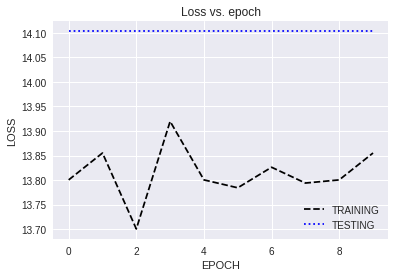

In [0]:
plt.plot(his.history['loss'],'--k')
plt.plot(his.history['val_loss'],':b')
plt.title('Loss vs. epoch')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend(['TRAINING', 'TESTING'], loc='best')


plt.show()

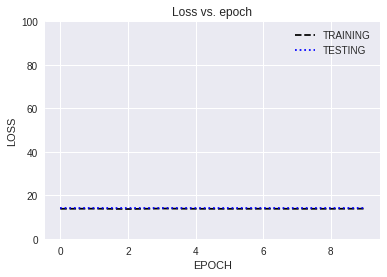

In [0]:
plt.plot(his.history['loss'],'--k')
plt.plot(his.history['val_loss'],':b')
plt.title('Loss vs. epoch')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend(['TRAINING', 'TESTING'], loc='best')
axes = plt.gca()
axes.set_ylim([0,100])

plt.show()

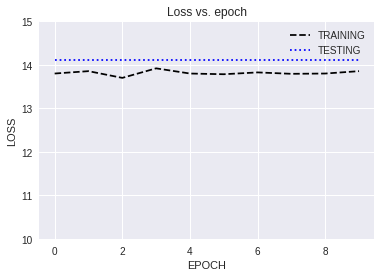

In [0]:
plt.plot(his.history['loss'],'--k')
plt.plot(his.history['val_loss'],':b')
plt.title('Loss vs. epoch')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend(['TRAINING', 'TESTING'], loc='best')
axes = plt.gca()
axes.set_ylim([10,15])

plt.show()

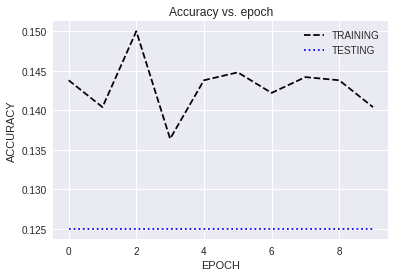

In [0]:
plt.plot(his.history['acc'],'--k')
plt.plot(his.history['val_acc'],':b')
plt.title('Accuracy vs. epoch')
plt.ylabel('ACCURACY')
plt.xlabel('EPOCH')
plt.legend(['TRAINING', 'TESTING'], loc='best')

plt.show()

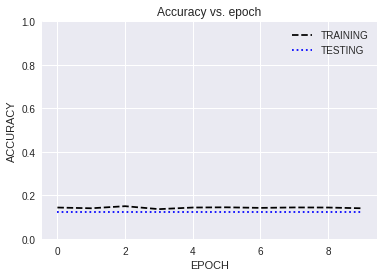

In [0]:
plt.plot(his.history['acc'],'--k')
plt.plot(his.history['val_acc'],':b')
plt.title('Accuracy vs. epoch')
plt.ylabel('ACCURACY')
plt.xlabel('EPOCH')
plt.legend(['TRAINING', 'TESTING'], loc='best')
axes = plt.gca()
axes.set_ylim([0,1])
plt.show()

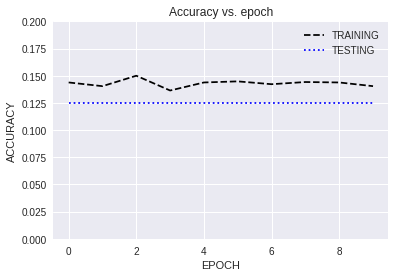

In [0]:
plt.plot(his.history['acc'],'--k')
plt.plot(his.history['val_acc'],':b')
plt.title('Accuracy vs. epoch')
plt.ylabel('ACCURACY')
plt.xlabel('EPOCH')
plt.legend(['TRAINING', 'TESTING'], loc='best')
axes = plt.gca()
axes.set_ylim([0,0.2])
plt.show()

In [0]:
from keras.models import load_model
model.save('alexnet.h5')
model = load_model('alexnet.h5')
from google.colab import files
files.download('alexnet.h5') 

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 38620, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 721, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

In [0]:
import pickle

f = open('his_alex.pckl', 'wb')
pickle.dump(his, f)
f.close()

f = open('his_alex.pckl', 'rb')
his = pickle.load(f)
f.close()

files.download('his_alex.pckl') 

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 39684, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 721, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

In [0]:
y_hat = model.predict_classes(x_test)


In [0]:
print("Classification Report")
print(classification_report(y_test, y_hat, digits=5))

Classification Report
              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000       100
           1    0.00000   0.00000   0.00000       100
           2    0.00000   0.00000   0.00000       100
           3    0.00000   0.00000   0.00000       100
           4    0.00000   0.00000   0.00000       100
           5    0.14286   1.00000   0.25000       100
           6    0.00000   0.00000   0.00000       100

   micro avg    0.14286   0.14286   0.14286       700
   macro avg    0.02041   0.14286   0.03571       700
weighted avg    0.02041   0.14286   0.03571       700



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
print("ACCURACY:",(accuracy_score(y_test, y_hat)))

ACCURACY: 0.14285714285714285


In [0]:
format(accuracy_score(y_test, y_hat))

'0.14285714285714285'